## DATA PREPROCESSING

#### Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [2]:
Demo = pd.read_excel("Telco_Customer_Churn.xlsx", sheet_name="Telco_Demo")
Services = pd.read_excel("Telco_Customer_Churn.xlsx", sheet_name="Telco_Services")
Status = pd.read_excel("Telco_Customer_Churn.xlsx", sheet_name="Telco_Status")

#### Customer_Demographics
- Add column: Age Range

In [3]:
Demo.head(10)

Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV    Male   78       No            Yes      No         No   
1  7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ  Female   80       No            Yes     Yes        Yes   
5  4412-YLTKF  Female   72       No            Yes      No        Yes   
6  0390-DCFDQ  Female   76       No            Yes     Yes        Yes   
7  3445-HXXGF    Male   66       No            Yes     Yes         No   
8  2656-FMOKZ  Female   70       No            Yes      No        Yes   
9  2070-FNEXE  Female   77       No            Yes      No        Yes   

   Number of Dependents  
0                     0  
1                     1  
2                     3  
3                     1  
4                     1  
5                     1  
6                     2  
7                     0  
8                     2  
9                     2

In [4]:
Demo.duplicated().sum()

0

In [5]:
Demo.isna().sum().sort_values(ascending = False)

Customer ID             0
Gender                  0
Age                     0
Under 30                0
Senior Citizen          0
Married                 0
Dependents              0
Number of Dependents    0
dtype: int64

Add column "Age Range"

In [6]:
Demo["Age Range"]= np.where(Demo['Age'] < 30, "Under 30", np.where(Demo['Age'] > 65, "Over 65", "From 30 To 65"))

In [7]:
Demo

Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0     8779-QRDMV    Male   78       No            Yes      No         No   
1     7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2     1658-BYGOY    Male   71       No            Yes      No        Yes   
3     4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4     4846-WHAFZ  Female   80       No            Yes     Yes        Yes   
...          ...     ...  ...      ...            ...     ...        ...   
7038  2569-WGERO  Female   30       No             No      No         No   
7039  6840-RESVB    Male   38       No             No     Yes        Yes   
7040  2234-XADUH  Female   30       No             No     Yes        Yes   
7041  4801-JZAZL  Female   32       No             No     Yes        Yes   
7042  3186-AJIEK    Male   44       No             No      No         No   

      Number of Dependents      Age Range  
0                        0        Over 65  
1                        1        Over 65  
2                        3        Over 65  
3                        1        Over 65  
4                        1        Over 65  
...                    ...            ...  
7038                     0  From 30 To 65  
7039                     2  From 30 To 65  
7040                     2  From 30 To 65  
7041                     2  From 30 To 65  
7042                     0  From 30 To 65  

[7043 rows x 9 columns]

#### Customer_Servies
- Drop columns: Offer

In [8]:
Services.duplicated().sum()

0

In [9]:
Services.isna().sum()

Customer ID                          0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges                        0
Total Refunds            

In [10]:
Services = Services.drop(["Offer"], axis=1)

In [11]:
Services

Customer ID Quarter Referred a Friend  Number of Referrals  \
0     8779-QRDMV      Q3                No                    0   
1     7495-OOKFY      Q3               Yes                    1   
2     1658-BYGOY      Q3                No                    0   
3     4598-XLKNJ      Q3               Yes                    1   
4     4846-WHAFZ      Q3               Yes                    1   
...          ...     ...               ...                  ...   
7038  2569-WGERO      Q3                No                    0   
7039  6840-RESVB      Q3               Yes                    1   
7040  2234-XADUH      Q3               Yes                    4   
7041  4801-JZAZL      Q3               Yes                    1   
7042  3186-AJIEK      Q3                No                    0   

      Tenure in Months Phone Service  Avg Monthly Long Distance Charges  \
0                    1            No                               0.00   
1                    8           Yes                              48.85   
2                   18           Yes                              11.33   
3                   25           Yes                              19.76   
4                   37           Yes                               6.33   
...                ...           ...                                ...   
7038                72           Yes                              22.77   
7039                24           Yes                              36.05   
7040                72           Yes                              29.66   
7041                11            No                               0.00   
7042                66           Yes                              30.96   

     Multiple Lines Internet Service Internet Type  ...  Unlimited Data  \
0                No              Yes           DSL  ...              No   
1               Yes              Yes   Fiber Optic  ...             Yes   
2               Yes              Yes   Fiber Optic  ...             Yes   
3                No              Yes   Fiber Optic  ...             Yes   
4               Yes              Yes   Fiber Optic  ...             Yes   
...             ...              ...           ...  ...             ...   
7038             No               No          None  ...              No   
7039            Yes              Yes         Cable  ...             Yes   
7040            Yes              Yes   Fiber Optic  ...             Yes   
7041             No              Yes           DSL  ...             Yes   
7042             No              Yes   Fiber Optic  ...             Yes   

            Contract Paperless Billing   Payment Method Monthly Charge  \
0     Month-to-Month               Yes  Bank Withdrawal          39.65   
1     Month-to-Month               Yes      Credit Card          80.65   
2     Month-to-Month               Yes  Bank Withdrawal          95.45   
3     Month-to-Month               Yes  Bank Withdrawal          98.50   
4     Month-to-Month               Yes  Bank Withdrawal          76.50   
...              ...               ...              ...            ...   
7038        Two Year               Yes  Bank Withdrawal          21.15   
7039        One Year               Yes     Mailed Check          84.80   
7040        One Year               Yes      Credit Card         103.20   
7041  Month-to-Month               Yes  Bank Withdrawal          29.60   
7042        Two Year               Yes  Bank Withdrawal         105.65   

     Total Charges Total Refunds Total Extra Data Charges  \
0            39.65          0.00                       20   
1           633.30          0.00                        0   
2          1752.55         45.61                        0   
3          2514.50         13.43                        0   
4          2868.15          0.00                        0   
...            ...           ...                      ...   
7038       1419.40         19.31                        0   
7039       1990.50   

#### Customer_Status
- Replace blank values in Churn Category, Churn Reason
- Add columns: Churn Score Category, CLTV Category

In [12]:
Status.duplicated().sum()

0

In [13]:
Status.isna().sum()

Customer ID              0
Quarter                  0
Satisfaction Score       0
Customer Status          0
Churn Label              0
Churn Value              0
Churn Score              0
CLTV                     0
Churn Category        5174
Churn Reason          5174
dtype: int64

Replace blanks

In [14]:
Status['Churn Category'] = np.where(Status['Churn Category'].isna() == True, "No churn", Status['Churn Category'])

In [15]:
Status['Churn Reason'] = np.where(Status['Churn Reason'].isna() == True, "No churn", Status['Churn Reason'])

Calculate Churn Score quantiles and add column Churn Score Category

In [16]:
arr = Status['Churn Score']
print("Q1 quantile of Churn Score: ", np.quantile(arr, .25))
print("Q2 quantile of Churn Score: ", np.quantile(arr, .50))
print("Q3 quantile of Churn Score: ", np.quantile(arr, .75))

Q1 quantile of Churn Score:  40.0
Q2 quantile of Churn Score:  61.0
Q3 quantile of Churn Score:  75.5


In [17]:
Status['Churn Score Category'] = Status.apply(lambda x: "Group 1" if x['Churn Score'] < 40 
                             else "Group 2" if x['Churn Score'] < 61 
                             else "Group 3" if x['Churn Score'] < 76
                             else "Group 4", axis = 1)

Calculate CLTV quantiles and add column CLTV Category

In [18]:
arr = Status['CLTV']
print("Q1 quantile of CLTV: ", np.quantile(arr, .25))
print("Q2 quantile of CLTV: ", np.quantile(arr, .50))
print("Q3 quantile of CLTV: ", np.quantile(arr, .75))

Q1 quantile of CLTV:  3469.0
Q2 quantile of CLTV:  4527.0
Q3 quantile of CLTV:  5380.5


In [19]:
Status['CLTV Category'] = Status.apply(lambda x: "Group 1" if x['CLTV'] < 3469 
                             else "Group 2" if x['CLTV'] < 4527 
                             else "Group 3" if x['CLTV'] < 5380.5
                             else "Group 4", axis = 1)

In [20]:
Status

Customer ID Quarter  Satisfaction Score Customer Status Churn Label  \
0     8779-QRDMV      Q3                   3         Churned         Yes   
1     7495-OOKFY      Q3                   3         Churned         Yes   
2     1658-BYGOY      Q3                   2         Churned         Yes   
3     4598-XLKNJ      Q3                   2         Churned         Yes   
4     4846-WHAFZ      Q3                   2         Churned         Yes   
...          ...     ...                 ...             ...         ...   
7038  2569-WGERO      Q3                   5          Stayed          No   
7039  6840-RESVB      Q3                   3          Stayed          No   
7040  2234-XADUH      Q3                   4          Stayed          No   
7041  4801-JZAZL      Q3                   4          Stayed          No   
7042  3186-AJIEK      Q3                   4          Stayed          No   

      Churn Value  Churn Score  CLTV   Churn Category  \
0               1           91  5433       Competitor   
1               1           69  5302       Competitor   
2               1           81  3179       Competitor   
3               1           88  5337  Dissatisfaction   
4               1           67  2793            Price   
...           ...          ...   ...              ...   
7038            0           45  5306         No churn   
7039            0           59  2140         No churn   
7040            0           71  5560         No churn   
7041            0           59  2793         No churn   
7042            0           38  5097         No churn   

                      Churn Reason Churn Score Category CLTV Category  
0     Competitor offered more data              Group 4       Group 4  
1     Competitor made better offer              Group 3       Group 3  
2     Competitor made better offer              Group 4       Group 1  
3        Limited range of services              Group 4       Group 3  
4               Extra data charges              Group 3       Group 1  
...                            ...                  ...           ...  
7038                      No churn              Group 2       Group 3  
7039                      No churn              Group 2       Group 1  
7040                      No churn              Group 3       Group 4  
7041                      No churn              Group 2       Group 1  
7042                      No churn              Group 1       Group 3  

[7043 rows x 12 columns]

#### Merge data into one table

In [21]:
data = Demo.merge(Services, on = 'Customer ID', how = 'inner').merge(Status, on = 'Customer ID', how = 'left')
data.head()

Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV    Male   78       No            Yes      No         No   
1  7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ  Female   80       No            Yes     Yes        Yes   

   Number of Dependents Age Range Quarter_x  ... Satisfaction Score  \
0                     0   Over 65        Q3  ...                  3   
1                     1   Over 65        Q3  ...                  3   
2                     3   Over 65        Q3  ...                  2   
3                     1   Over 65        Q3  ...                  2   
4                     1   Over 65        Q3  ...                  2   

   Customer Status  Churn Label Churn Value  Churn Score  CLTV  \
0          Churned          Yes           1           91  5433   
1          Churned          Yes           1           69  5302   
2          Churned          Yes           1           81  3179   
3          Churned          Yes           1           88  5337   
4          Churned          Yes           1           67  2793   

    Churn Category                  Churn Reason  Churn Score Category  \
0       Competitor  Competitor offered more data               Group 4   
1       Competitor  Competitor made better offer               Group 3   
2       Competitor  Competitor made better offer               Group 4   
3  Dissatisfaction     Limited range of services               Group 4   
4            Price            Extra data charges               Group 3   

  CLTV Category  
0       Group 4  
1       Group 3  
2       Group 1  
3       Group 3  
4       Group 1  

[5 rows x 47 columns]

## DATA EXPLORATION
- Phone, Internet, Unlimited data

In [22]:
print(data.columns.values)

['Customer ID' 'Gender' 'Age' 'Under 30' 'Senior Citizen' 'Married'
 'Dependents' 'Number of Dependents' 'Age Range' 'Quarter_x'
 'Referred a Friend' 'Number of Referrals' 'Tenure in Months'
 'Phone Service' 'Avg Monthly Long Distance Charges' 'Multiple Lines'
 'Internet Service' 'Internet Type' 'Avg Monthly GB Download'
 'Online Security' 'Online Backup' 'Device Protection Plan'
 'Premium Tech Support' 'Streaming TV' 'Streaming Movies'
 'Streaming Music' 'Unlimited Data' 'Contract' 'Paperless Billing'
 'Payment Method' 'Monthly Charge' 'Total Charges' 'Total Refunds'
 'Total Extra Data Charges' 'Total Long Distance Charges' 'Total Revenue'
 'Quarter_y' 'Satisfaction Score' 'Customer Status' 'Churn Label'
 'Churn Value' 'Churn Score' 'CLTV' 'Churn Category' 'Churn Reason'
 'Churn Score Category' 'CLTV Category']


In [23]:
service = ['Gender', 'Married', 'Dependents', 'Referred a Friend', 'Phone Service', 'Multiple Lines', 'Internet Service',
           'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
           'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing']
for a in range (1, len(service)):
    data[service[a]] = data.apply(lambda x: 1 if x[service[a]] == "Yes" 
                            else 0, axis = 1)

In [24]:
data['Internet Type'] = data.apply(lambda x: 1 if x['Internet Type'] == "DSL" 
                             else 2 if x['Internet Type'] == "Fiber Optic" 
                             else 3 if x['Internet Type'] == "Cable"
                             else 4, axis = 1)
                            
data['Contract'] = data.apply(lambda x: 1 if x['Contract'] == "Month-to-Month" 
                             else 2 if x['Contract'] == "One Year" 
                             else 3, axis = 1)

data['Payment Method'] = data.apply(lambda x: 1 if x['Payment Method'] == "Bank Withdrawal" 
                             else 2 if x['Payment Method'] == "Credit Card" 
                             else 3, axis = 1)

data['Age Range'] = data.apply(lambda x: 1 if x['Age Range'] == "Under 30" 
                             else 2 if x['Age Range'] == "From 30 To 65" 
                             else 3, axis = 1)
                            

In [25]:
data['NumberOfServices']=(data[['Phone Service', 'Multiple Lines','Internet Service', 'Online Security', 'Online Backup',
'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']] == 1).sum(axis=1)

In [26]:
data

Customer ID  Gender  Age Under 30 Senior Citizen  Married  Dependents  \
0     8779-QRDMV    Male   78       No            Yes        0           0   
1     7495-OOKFY  Female   74       No            Yes        1           1   
2     1658-BYGOY    Male   71       No            Yes        0           1   
3     4598-XLKNJ  Female   78       No            Yes        1           1   
4     4846-WHAFZ  Female   80       No            Yes        1           1   
...          ...     ...  ...      ...            ...      ...         ...   
7038  2569-WGERO  Female   30       No             No        0           0   
7039  6840-RESVB    Male   38       No             No        1           1   
7040  2234-XADUH  Female   30       No             No        1           1   
7041  4801-JZAZL  Female   32       No             No        1           1   
7042  3186-AJIEK    Male   44       No             No        0           0   

      Number of Dependents  Age Range Quarter_x  ...  Customer Status  \
0                        0          3        Q3  ...          Churned   
1                        1          3        Q3  ...          Churned   
2                        3          3        Q3  ...          Churned   
3                        1          3        Q3  ...          Churned   
4                        1          3        Q3  ...          Churned   
...                    ...        ...       ...  ...              ...   
7038                     0          2        Q3  ...           Stayed   
7039                     2          2        Q3  ...           Stayed   
7040                     2          2        Q3  ...           Stayed   
7041                     2          2        Q3  ...           Stayed   
7042                     0          2        Q3  ...           Stayed   

      Churn Label  Churn Value  Churn Score  CLTV   Churn Category  \
0             Yes            1           91  5433       Competitor   
1             Yes            1           69  5302       Competitor   
2             Yes            1           81  3179       Competitor   
3             Yes            1           88  5337  Dissatisfaction   
4             Yes            1           67  2793            Price   
...           ...          ...          ...   ...              ...   
7038           No            0           45  5306         No churn   
7039           No            0           59  2140         No churn   
7040           No            0           71  5560         No churn   
7041           No            0           59  2793         No churn   
7042           No            0           38  5097         No churn   

                      Churn Reason  Churn Score Category  CLTV Category  \
0     Competitor offered more data               Group 4        Group 4   
1     Competitor made better offer               Group 3        Group 3   
2     Competitor made better offer               Group 4        Group 1   
3        Limited range of services               Group 4        Group 3   
4               Extra data charges               Group 3        Group 1   
...                            ...                   ...            ...   
7038                      No churn               Group 2        Group 3   
7039                      No churn               Group 2        Group 1   
7040                      No churn               Group 3        Group 4   
7041                      No churn               Group 2        Group 1   
7042                      No churn               Group 1        Group 3   

      NumberOfServices  
0                    3  
1                    5  
2                    7  
3                    7  
4                    4  
...                ...  
7038                 1  
7039                10  
7040                 9  
7041                 3  
7042                 9  

[7043 rows x 48 columns]

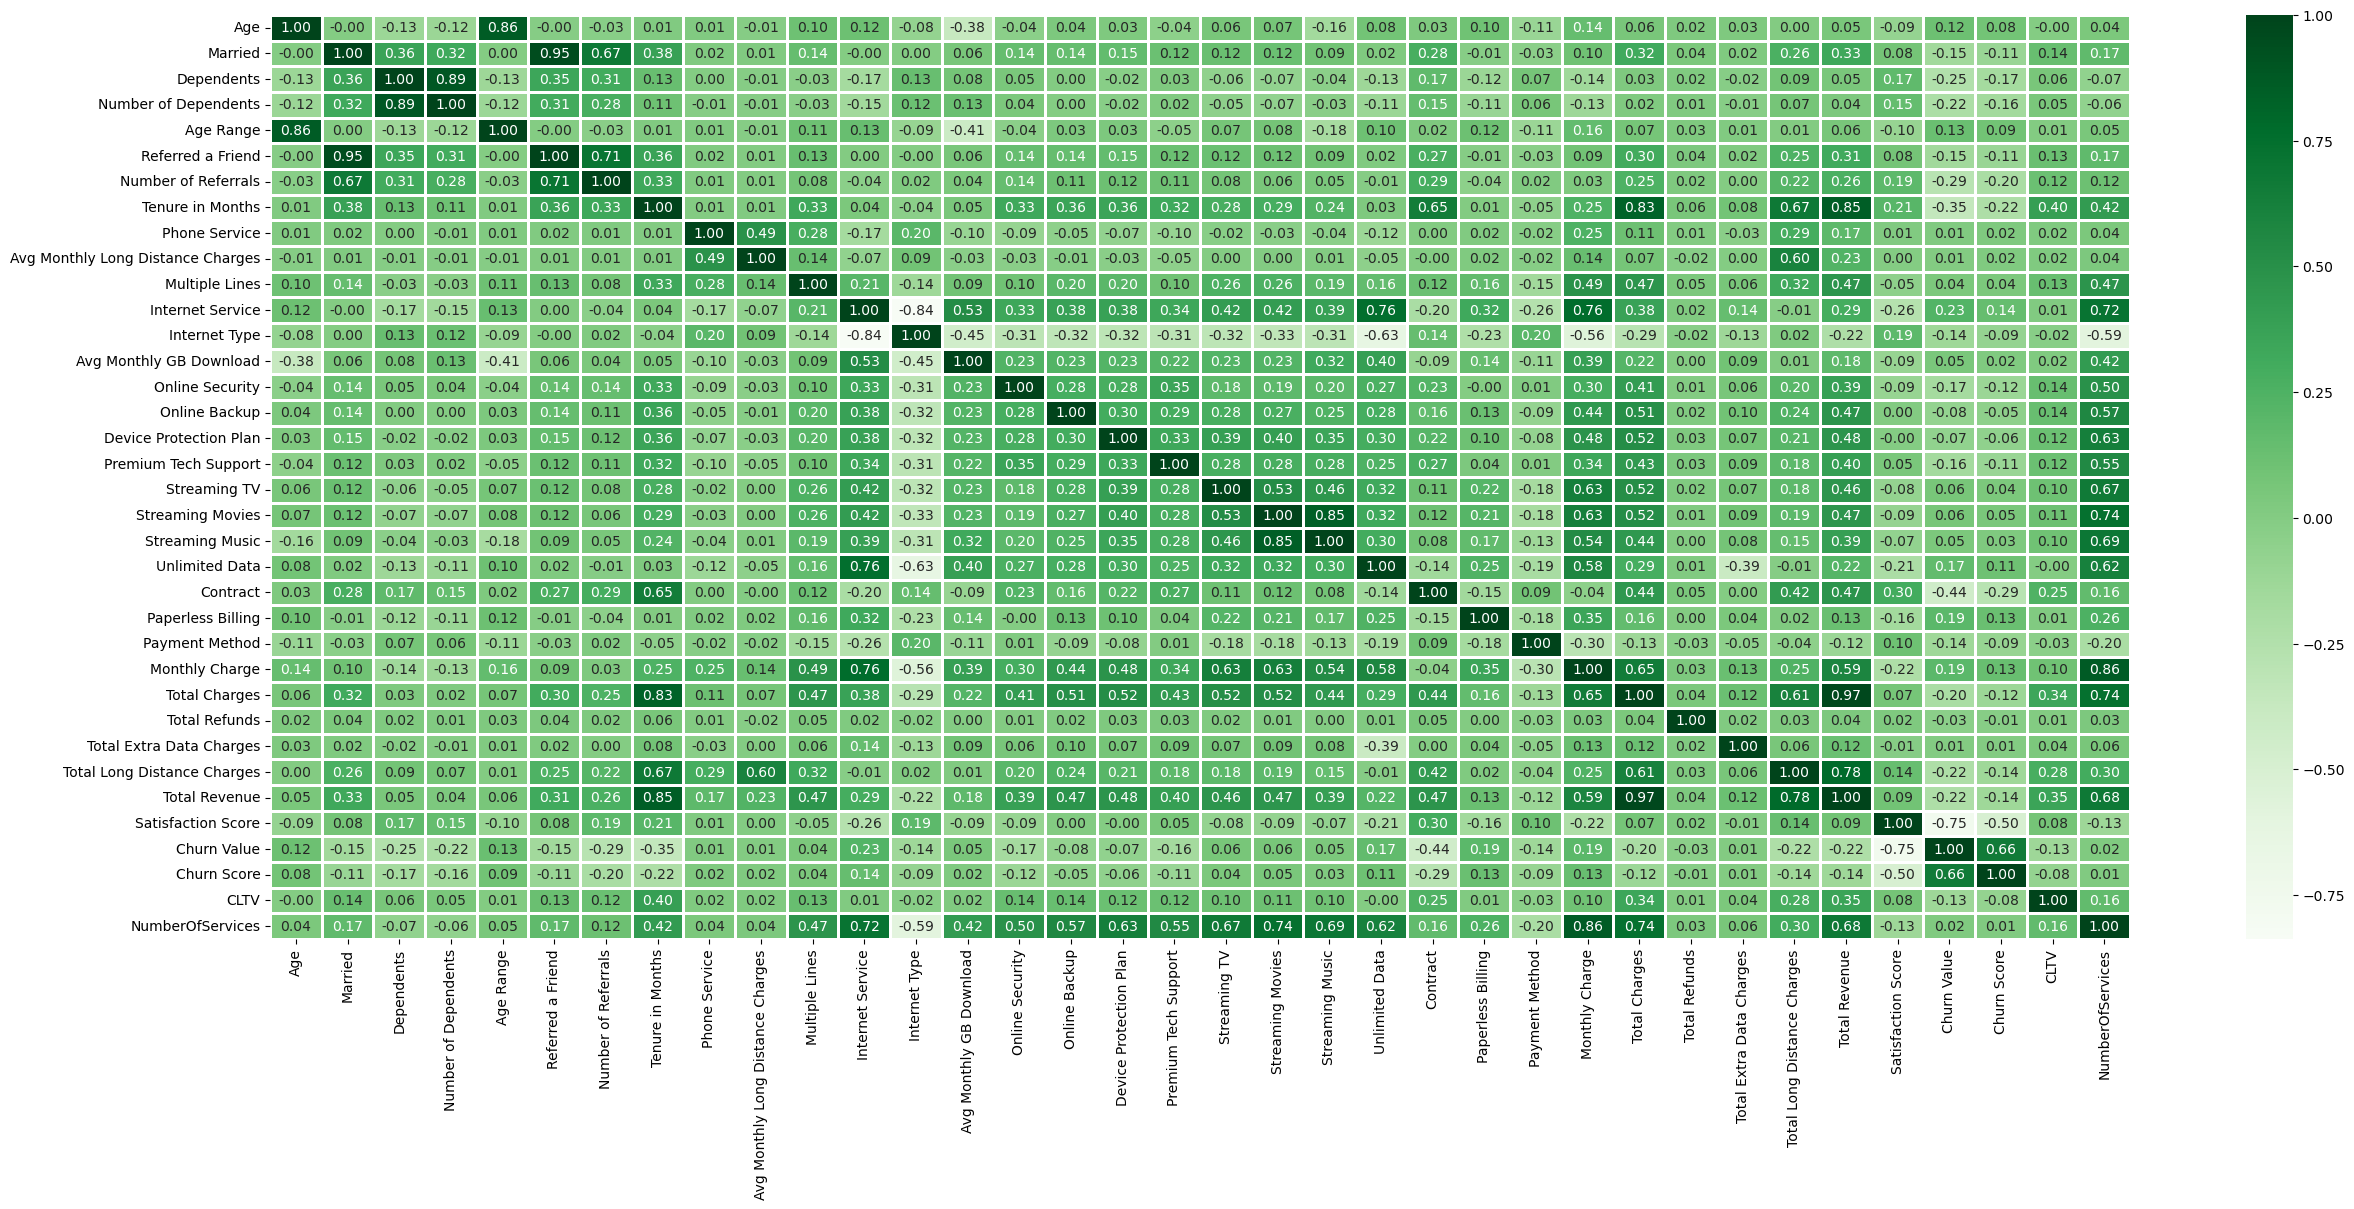

In [27]:
f, ax = plt.subplots(figsize = (30, 12))
sns.heatmap(data.corr(), annot = True, ax = ax, lw = 1, linecolor = 'white', fmt = '.2f', cmap="Greens")
plt.show();

## K-MEANS CLUSTERING

#### PCA

In [28]:
data['Customer Status'].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

In [29]:
df=data[['Churn Score','Contract', 'Tenure in Months', 'Satisfaction Score',
         'Number of Referrals', 'Monthly Charge','Total Revenue',
         'NumberOfServices', 'Dependents','Unlimited Data', 'Internet Service']]

In [30]:
# Reduce down to 3 features
pca = PCA(n_components=3)
pca.fit(df)
PCA_ds = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean          std          min          25%         50%  \
col1  7043.0  8.508676e-13  2865.338137 -3013.363754 -2428.972978 -925.712099   
col2  7043.0  1.287740e-14    27.176893   -64.567874   -20.511094   -0.972462   
col3  7043.0 -2.448512e-15    19.166393   -46.673533   -14.280601   -1.119667   

              75%          max  
col1  1766.914891  8945.136377  
col2    19.580729    73.818370  
col3    13.589829    59.257394

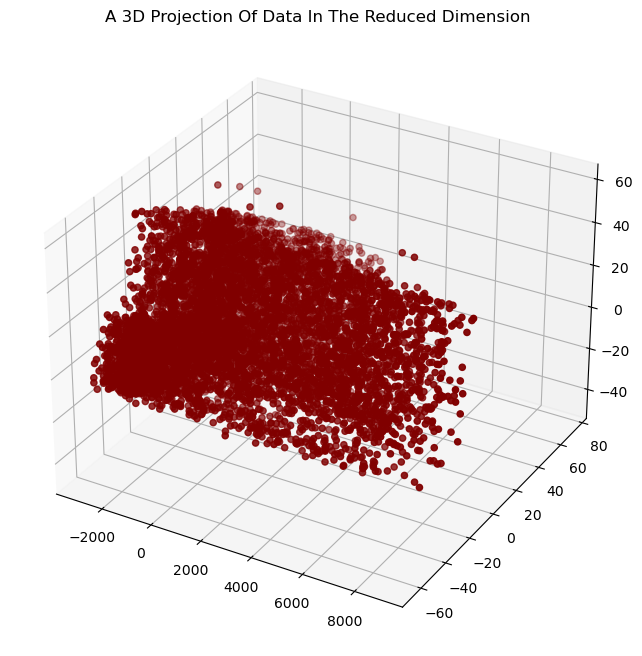

In [31]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

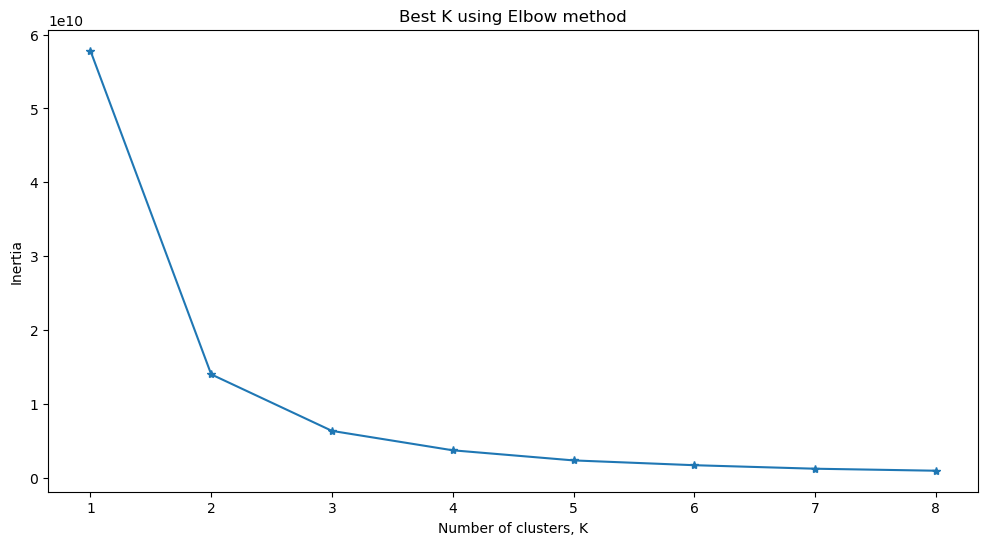

In [32]:
inertia= []
k= np.arange(1,9)
for i in k:
    model = KMeans(n_clusters= i, max_iter=5)
    af = model.fit(PCA_ds)
    inertia.append(pd.Series({'k': i,
                              'inertia': model.inertia_
                             }))
inertias= pd.concat(inertia, axis=1).T.set_index('k')
# draw elbow
plt.figure(figsize=(12,6));
plt.plot(inertias.index, inertias['inertia'], '-*');
plt.title('Best K using Elbow method');
plt.xlabel('Number of clusters, K');
plt.ylabel('Inertia');
plt.xticks(k);
plt.show();

Kể từ vị trí K=3, sự giảm không còn đáng kể  
=> Chọn K=3

#### K-Means Clustering

In [33]:
model = KMeans(n_clusters=3, random_state=0).fit(PCA_ds)
pr_AC = model.predict(PCA_ds)
PCA_ds["Clusters"] = pr_AC

# Thêm cột Cluster vào dữ liệu df
df["Clusters"]= pr_AC

# Thêm cột Churn vào dữ liệu df đã được giảm chiều dữ liệu
PCA_ds['Churn'] = data['Churn Value']
df["Churn"]= data['Churn Value']

# Lấy ra những khách hàng đã rời bỏ (Churn = True)
PCA_ds_Churn = PCA_ds[PCA_ds['Churn'] == 1]
df_Churn = df[df.Churn == True]

C:\Users\win\AppData\Local\Temp\ipykernel_25740\2391620157.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clusters"]= pr_AC
C:\Users\win\AppData\Local\Temp\ipykernel_25740\2391620157.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Churn"]= data['Churn Value']


In [34]:
data["Clusters"]= pr_AC


In [35]:
data_Churn =data[data['Churn Value'] == 1]

In [36]:
data_Churn

Customer ID  Gender  Age Under 30 Senior Citizen  Married  Dependents  \
0     8779-QRDMV    Male   78       No            Yes        0           0   
1     7495-OOKFY  Female   74       No            Yes        1           1   
2     1658-BYGOY    Male   71       No            Yes        0           1   
3     4598-XLKNJ  Female   78       No            Yes        1           1   
4     4846-WHAFZ  Female   80       No            Yes        1           1   
...          ...     ...  ...      ...            ...      ...         ...   
2530  5482-NUPNA  Female   28      Yes             No        0           0   
2531  1122-JWTJW    Male   64       No             No        1           1   
2532  1699-HPSBG    Male   44       No             No        0           0   
2533  8775-CEBBJ  Female   40       No             No        0           0   
2534  0639-TSIQW  Female   28      Yes             No        0           0   

      Number of Dependents  Age Range Quarter_x  ...  Churn Label  \
0                        0          3        Q3  ...          Yes   
1                        1          3        Q3  ...          Yes   
2                        3          3        Q3  ...          Yes   
3                        1          3        Q3  ...          Yes   
4                        1          3        Q3  ...          Yes   
...                    ...        ...       ...  ...          ...   
2530                     0          1        Q3  ...          Yes   
2531                     2          2        Q3  ...          Yes   
2532                     0          2        Q3  ...          Yes   
2533                     0          2        Q3  ...          Yes   
2534                     0          1        Q3  ...          Yes   

      Churn Value  Churn Score  CLTV   Churn Category  \
0               1           91  5433       Competitor   
1               1           69  5302       Competitor   
2               1           81  3179       Competitor   
3               1           88  5337  Dissatisfaction   
4               1           67  2793            Price   
...           ...          ...   ...              ...   
2530            1           90  5730       Competitor   
2531            1           82  3463       Competitor   
2532            1           69  4581       Competitor   
2533            1           87  2029       Competitor   
2534            1           70  5620       Competitor   

                                   Churn Reason  Churn Score Category  \
0                  Competitor offered more data               Group 4   
1                  Competitor made better offer               Group 3   
2                  Competitor made better offer               Group 4   
3                     Limited range of services               Group 4   
4                            Extra data charges               Group 3   
...                                         ...                   ...   
2530              Competitor had better devices               Group 4   
2531              Competitor had better devices               Group 4   
2532  Competitor offered higher download speeds               Group 3   
2533  Competitor offered higher download speeds               Group 4   
2534               Competitor offered more data               Group 3   

      CLTV Category  NumberOfServices  Clusters  
0           Group 4                 3         0  
1           Group 3                 5         0  
2           Group 1                 7         0  
3           Group 3                 7         2  
4           Group 1                 4         2  
...             ...               ...       ...  
2530        Group 4                 6         0  
2531        Group 1                 3         0  
2532        Group 3                 5         0  
2533        Group 1                 3         0  
2534        Group 4                 8         1  

[1869 rows x 49 columns]

In [37]:
PCA_ds

col1       col2       col3  Clusters  Churn
0    -2975.010310 -10.520933 -27.846839         0      1
1    -2010.276442 -30.581467   5.705473         0      1
2    -1123.384378 -43.085049  -2.446338         0      1
3      -39.181782 -43.856444 -11.126615         2      1
4       68.074224 -11.932618  -3.597346         2      1
...           ...        ...        ...       ...    ...
7038     5.181040  55.296971 -11.960064         2      0
7039  -226.833259 -20.475718   9.857476         2      0
7040  6418.879371  -9.655216 -16.554385         1      0
7041 -2715.418490  15.888852  -5.417985         0      0
7042  5853.729730  -0.458418  16.260170         1      0

[7043 rows x 5 columns]

#### Clusters visualization

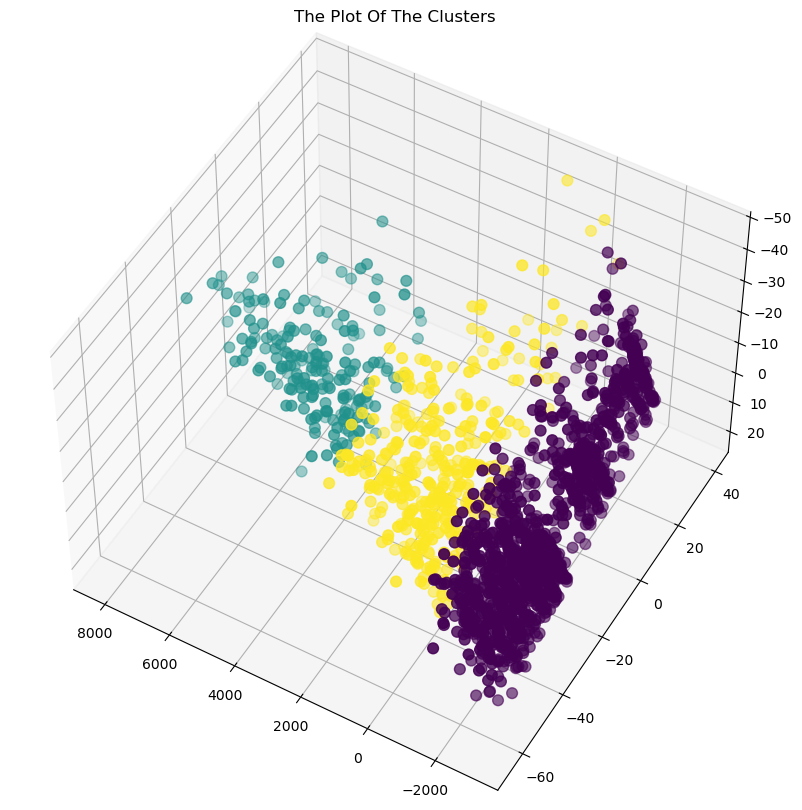

In [38]:
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(1,1,1, projection='3d', label="bla")
ax.scatter(PCA_ds_Churn['col1'], PCA_ds_Churn['col2'], PCA_ds_Churn['col3'], s=60, c=PCA_ds_Churn["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
ax.view_init(-130, 60)
plt.show()

In [39]:
score=silhouette_score(PCA_ds, PCA_ds["Clusters"], metric = "euclidean")
print("KMeans Silhouette score:", score)

KMeans Silhouette score: 0.6253931541310501


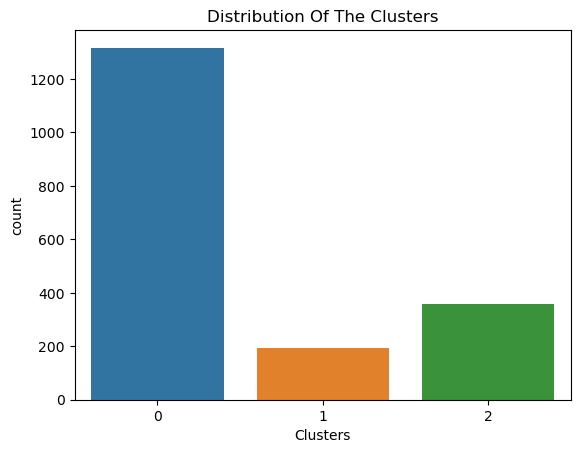

In [40]:
pl = sns.countplot(x=df_Churn["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [41]:
df[df.Churn==True]['Clusters'].value_counts()

0    1317
2     358
1     194
Name: Clusters, dtype: int64

In [42]:
data_Churn.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Age Range', 'Quarter_x',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Quarter_y', 'Satisfaction Score', 'Customer Status',
       'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Category',
       'Churn Reason', 'Churn Score Category', 'CLTV Category',
       'NumberOfServices', 'Clusters'],
      dtype=

In [43]:
import plotly.express as px
ft= ['Churn Score', 'Tenure in Months', 'Monthly Charge','Total Revenue','NumberOfServices','Age', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
'Avg Monthly GB Download','Premium Tech Support','Streaming TV','CLTV',  'Premium Tech Support','Device Protection Plan','Streaming Movies', 'Streaming Music' ]
for i in ft:
    fig = px.box(data_Churn, x="Clusters", y=i, points="all")
    fig.show()

In [44]:
monthly_and_tenure = df_Churn [['Monthly Charge','Tenure in Months', 'Clusters']]
monthly_and_tenure

Monthly Charge  Tenure in Months  Clusters
0              39.65                 1         0
1              80.65                 8         0
2              95.45                18         0
3              98.50                25         2
4              76.50                37         2
...              ...               ...       ...
2530           60.40                 4         0
2531           70.65                 1         0
2532           59.80                12         0
2533           44.20                 9         0
2534          102.95                67         1

[1869 rows x 3 columns]

In [45]:
plt.figure(figsize=(13, 8))
pl = sns.scatterplot( monthly_and_tenure['Monthly Charge'], monthly_and_tenure['Tenure in Months'],
           hue = monthly_and_tenure['Clusters'], ci=None, palette= ["#034f84", "#ffcc5c", "#86af49"], markers ='o', s=90)

pl.set_title('Clustering churned users by monthly Charges and tenure')
pl.set_xlabel('Monthly Charges')
pl.set_ylabel('Tenure in Months')
plt.tight_layout()
plt.show()

C:\Users\win\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



### Ý nghĩa 
+ Cụm 0 : Khách hàng có phí hàng tháng thấp và thời hạn sử dụng thấp: Có thể là kết nối tạm thời đối với họ hoặc những người đang tìm kiếm dịch vụ rất tối thiểu đã tìm thấy nhà cung cấp dịch vụ cung cấp mức phí thậm chí thấp hơn cho các dịch vụ cơ bản và rời đi nhanh chóng mặc dù phí hàng tháng thấp.
+ Cụm 1: Khách hàng có mức phí hàng tháng cao và thời hạn sử dụng cao: Nhóm người dùng rời bỏ thú đặc biệt nhất. Họ đã lựa chọn dịch vụ của DN mặc dù giá cao vì họ nghĩ rằng dịch vụ này đáng giá hoặc đơn giản là họ không còn lựa chọn nào tốt hơn. DN nên xem xét kỹ các phương pháp giữ chân nhóm khách hàng.
+ Cụm 2: Khách hàng có mức phí hàng tháng trung bình và thời hạn sử dụng cao: Nhóm khách hàng này cũng là một nhóm khá là đặc biệt. Với một mức giá không quá thấp họ đã sử dụng một thời gian lâu nhưng họ lại lựa chọn rời đi. DN cần xem xét kỹ và đưa ra các chính sách để giữ chân họ.


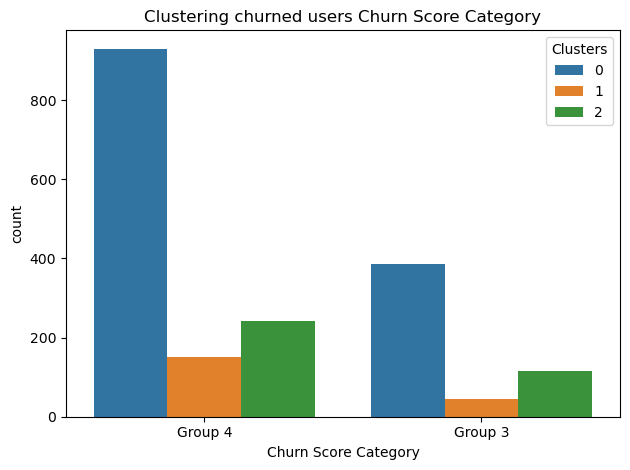

In [46]:
pl = sns.countplot(x=data_Churn['Churn Score Category'], hue=data_Churn['Clusters'] )
pl.set_title('Clustering churned users Churn Score Category')
plt.tight_layout()
plt.show()

In [47]:
pl = sns.countplot(x=data_Churn['Churn Category'], hue=data_Churn['Clusters'] )
pl.set_title('Clustering churned users by Churn Category')
plt.tight_layout()
plt.show()

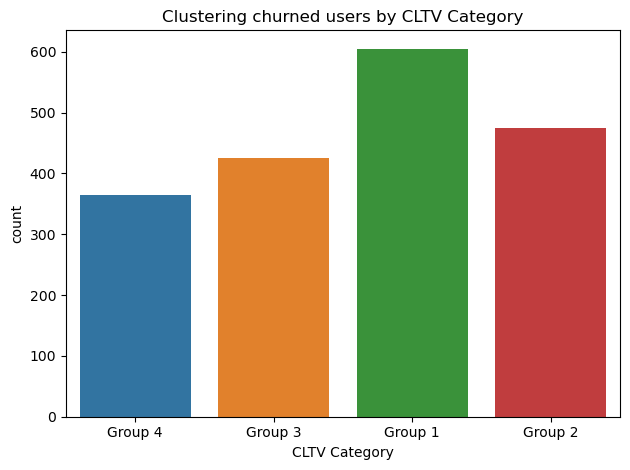

In [48]:
pl = sns.countplot(x=data_Churn['CLTV Category'] )
pl.set_title('Clustering churned users by CLTV Category')
plt.tight_layout()
plt.show()

In [49]:
pl = sns.countplot(x=data_Churn['CLTV Category'], hue=data_Churn['Clusters'] )
pl.set_title('Clustering churned users by CLTV Category')
plt.tight_layout()
plt.show()

In [50]:
pl = sns.countplot(x=data_Churn['Satisfaction Score'], hue=data_Churn['Clusters'])
pl.set_title('Clustering churned users by Satisfaction Score')
plt.tight_layout()
plt.show()

In [51]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
pl = sns.countplot(x=data_Churn['Churn Reason'], hue=data_Churn['Clusters'])
pl.set_title('Clustering churned users by Churn Reason')
plt.tight_layout()
plt.show()

C:\Users\win\AppData\Local\Temp\ipykernel_25740\2143820306.py:3: UserWarning:

FixedFormatter should only be used together with FixedLocator

